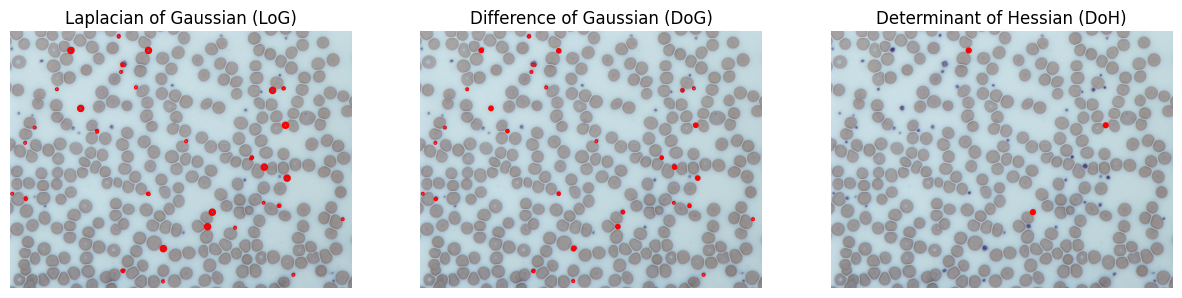

Number of blobs detected using LoG: 43
Number of blobs detected using DoG: 32
Number of blobs detected using DoH: 3


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage import img_as_float

image = cv2.imread('p1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to HSV to extract purple regions
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
lower_purple = np.array([120, 50, 50])
upper_purple = np.array([160, 255, 255])
mask = cv2.inRange(hsv_image, lower_purple, upper_purple)

# Extract only the purple regions
purple_regions = cv2.bitwise_and(image, image, mask=mask)
purple_gray = rgb2gray(purple_regions)

# 1️⃣ Apply Laplacian of Gaussian (LoG)
blobs_log = blob_log(purple_gray, max_sigma=30, num_sigma=10, threshold=0.1)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

# 2️⃣ Apply Difference of Gaussian (DoG)
blobs_dog = blob_dog(purple_gray, max_sigma=30, threshold=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

blobs_doh = blob_doh(purple_gray, max_sigma=30, threshold=0.01)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Laplacian of Gaussian (LoG)', 'Difference of Gaussian (DoG)', 'Determinant of Hessian (DoH)']
blobs = [blobs_log, blobs_dog, blobs_doh]

for ax, title, blobs_detected in zip(axes, titles, blobs):
    ax.imshow(image)
    ax.set_title(title)
    ax.axis("off")

    for blob in blobs_detected:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)

plt.show()

# Print Number of Detected Blobs
print(f"Number of blobs detected using LoG: {len(blobs_log)}")
print(f"Number of blobs detected using DoG: {len(blobs_dog)}")
print(f"Number of blobs detected using DoH: {len(blobs_doh)}")

Applying LoG on Image 1


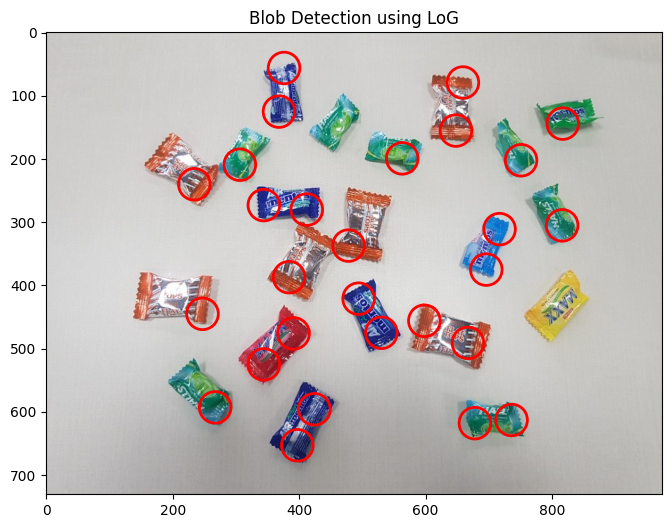

Number of blobs detected in Image 1: 28
Applying DoG on Image 1


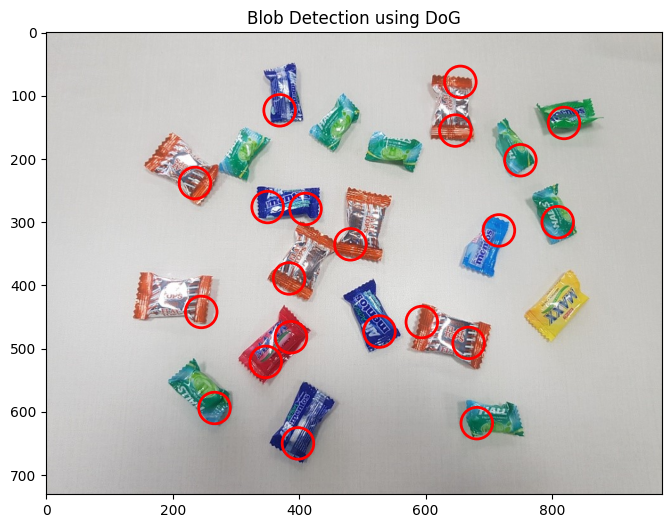

Number of blobs detected in Image 1: 21
Applying DoH on Image 1


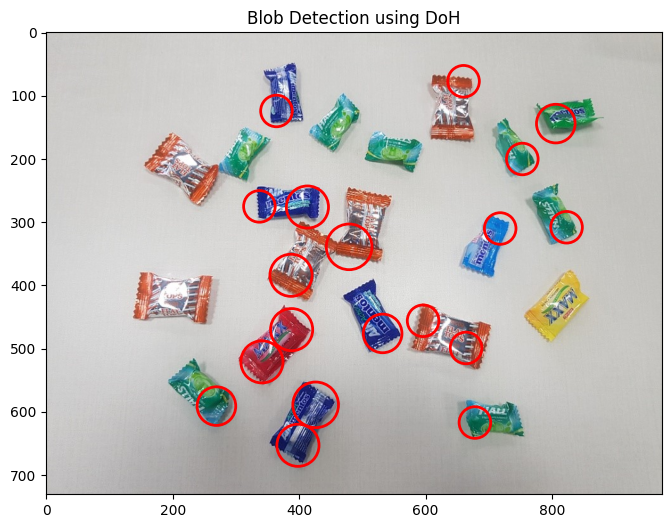

Number of blobs detected in Image 1: 19


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing, area_opening, area_closing
from skimage.io import imread

def preprocess_image(image):
    # Check if the image has an alpha channel (4 channels)
    if image.shape[2] == 4:
        # Convert RGBA to RGB by dropping the alpha channel
        image = image[:, :, :3]

    if image.ndim == 3:
        gray = rgb2gray(image)
    else:
        gray = image

    binary = gray < 0.45

    struct_elem = np.array([[0,1,0],
                             [1,1,1],
                             [0,1,0]])

    def multi_erosion(image, num):
        for _ in range(num):
            image = erosion(image, struct_elem)
        return image

    def multi_dilation(image, num):
        for _ in range(num):
            image = dilation(image, struct_elem)
        return image

    eroded = multi_erosion(binary, 2)
    opened = opening(eroded)
    dilated = multi_dilation(opened, 2)
    morphed = area_opening(area_closing(dilated, 10), 10)
    return morphed


def detect_blobs(image, method="LoG"):
    preprocessed = preprocess_image(image)

    if method == "LoG":
        blobs = blob_log(preprocessed, min_sigma=25, max_sigma=50, num_sigma=10, threshold=0.05)
    elif method == "DoG":
        blobs = blob_dog(preprocessed, min_sigma=25, max_sigma=50, sigma_ratio=1.6, threshold=0.05)
    elif method == "DoH":
        blobs = blob_doh(preprocessed, min_sigma=25, max_sigma=50, threshold=0.01)
    else:
        raise ValueError("Invalid method. Choose 'LoG', 'DoG', or 'HoG'")

    return blobs

def plot_blobs(image, blobs, method):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        circle = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(circle)
    plt.title(f"Blob Detection using {method}")
    plt.show()

# Load images
image1 = imread("p2.jpg")

# Apply different blob detection techniques
methods = ["LoG", "DoG", "DoH"]
for method in methods:
    print(f"Applying {method} on Image 1")
    blobs1 = detect_blobs(image1, method)
    plot_blobs(image1, blobs1, method)
    print(f"Number of blobs detected in Image 1: {len(blobs1)}")

Applying LoG on Image 3


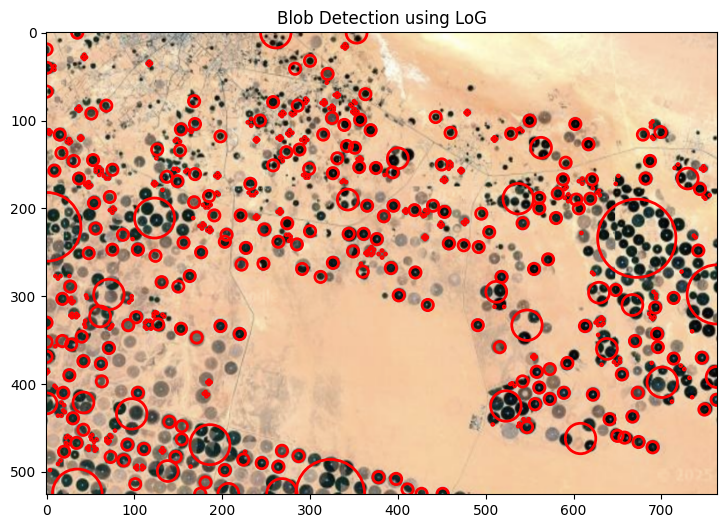

Number of blobs detected in Image 3: 627
Applying LoG on Image 4


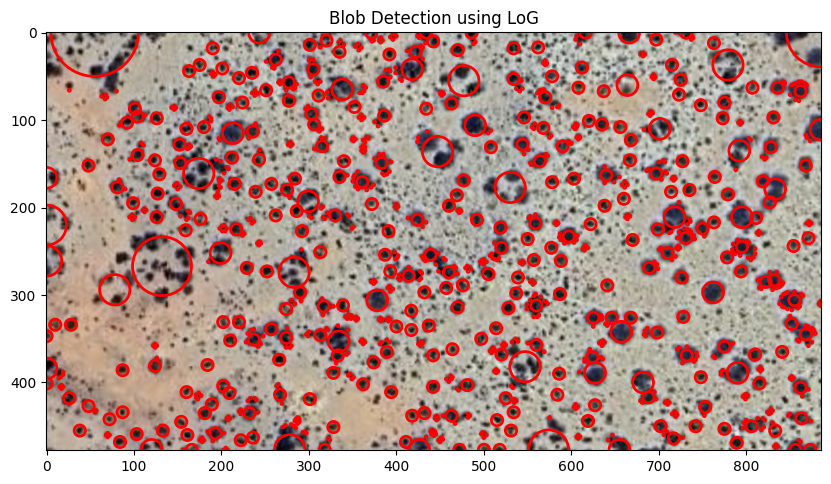

Number of blobs detected in Image 4: 1104
Applying DoG on Image 3


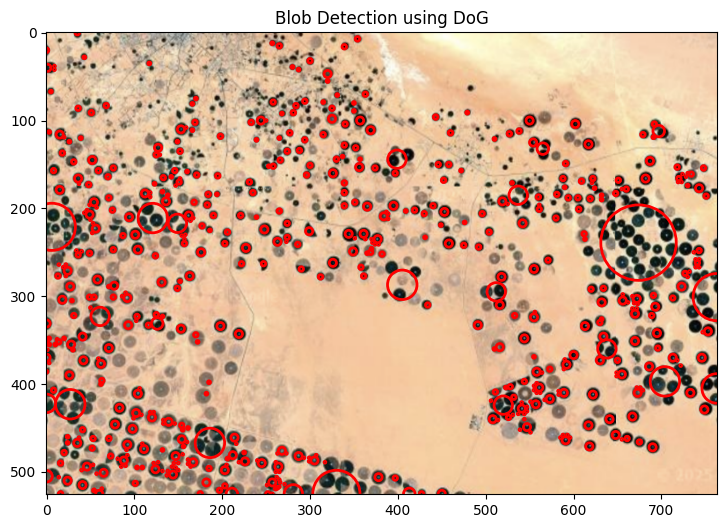

Number of blobs detected in Image 3: 584
Applying DoG on Image 4


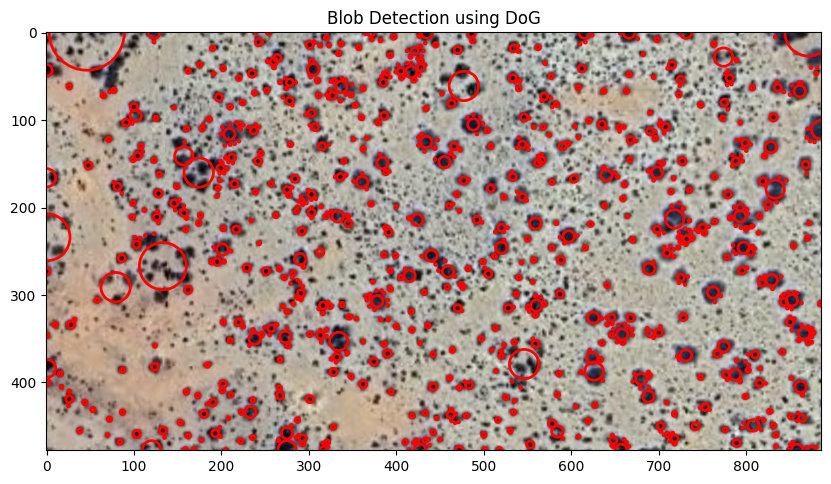

Number of blobs detected in Image 4: 913
Applying HoG on Image 3


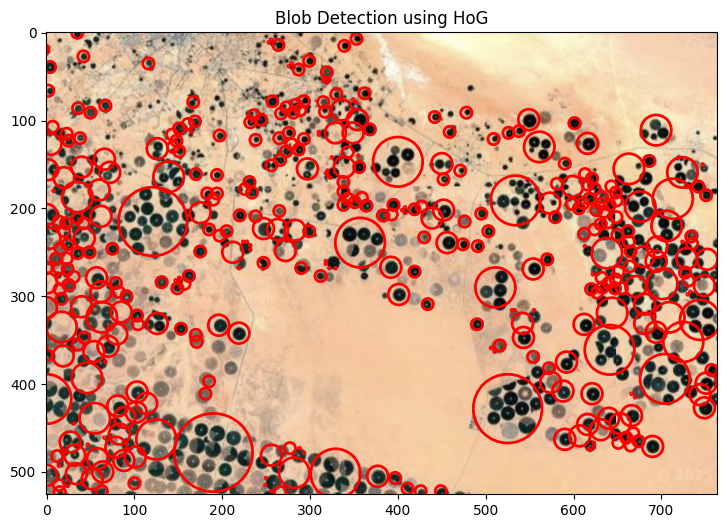

Number of blobs detected in Image 3: 398
Applying HoG on Image 4


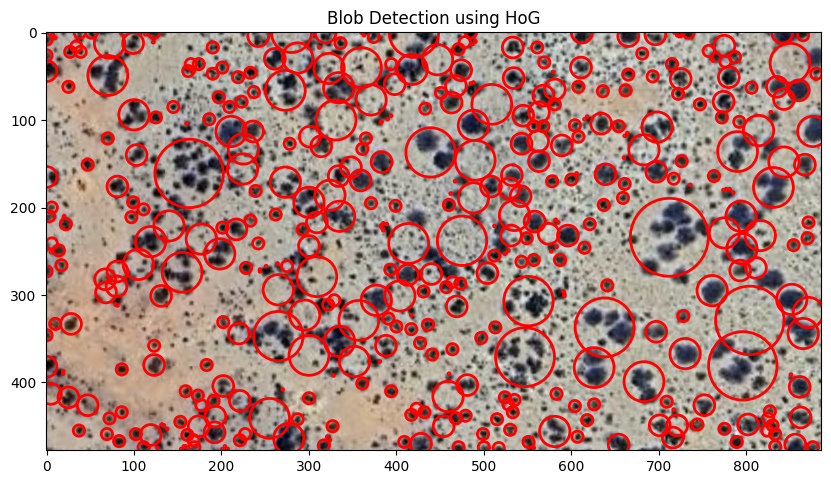

Number of blobs detected in Image 4: 435


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing, area_opening, area_closing
from skimage.io import imread

def preprocess_image(image):
    # Check if the image has an alpha channel (4 channels)
    if image.shape[2] == 4:
        # Convert RGBA to RGB by dropping the alpha channel
        image = image[:, :, :3]

    if image.ndim == 3:
        gray = rgb2gray(image)
    else:
        gray = image

    binary = gray < 0.45

    struct_elem = np.array([[0,1,0],
                             [1,1,1],
                             [0,1,0]])

    def multi_erosion(image, num):
        for _ in range(num):
            image = erosion(image, struct_elem)
        return image

    def multi_dilation(image, num):
        for _ in range(num):
            image = dilation(image, struct_elem)
        return image

    eroded = multi_erosion(binary, 2)
    opened = opening(eroded)
    dilated = multi_dilation(opened, 2)
    morphed = area_opening(area_closing(dilated, 10), 10)
    return morphed


def detect_blobs(image, method="LoG"):
    preprocessed = preprocess_image(image)

    if method == "LoG":
        blobs = blob_log(preprocessed, min_sigma=1, max_sigma=50, num_sigma=10, threshold=0.05)
    elif method == "DoG":
        blobs = blob_dog(preprocessed, min_sigma=1, max_sigma=50, sigma_ratio=1.6, threshold=0.05)
    elif method == "HoG":
        blobs = blob_doh(preprocessed, min_sigma=1, max_sigma=50, threshold=0.01)
    else:
        raise ValueError("Invalid method. Choose 'LoG', 'DoG', or 'HoG'")

    return blobs

def plot_blobs(image, blobs, method):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        circle = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(circle)
    plt.title(f"Blob Detection using {method}")
    plt.show()

# Load images
image3 = imread("p3.png")
image4 = imread("p4.png")

# Apply different blob detection techniques
methods = ["LoG", "DoG", "HoG"]
for method in methods:
    print(f"Applying {method} on Image 3")
    blobs3 = detect_blobs(image3, method)
    plot_blobs(image3, blobs3, method)
    print(f"Number of blobs detected in Image 3: {len(blobs3)}")

    print(f"Applying {method} on Image 4")
    blobs4 = detect_blobs(image4, method)
    plot_blobs(image4, blobs4, method)
    print(f"Number of blobs detected in Image 4: {len(blobs4)}")

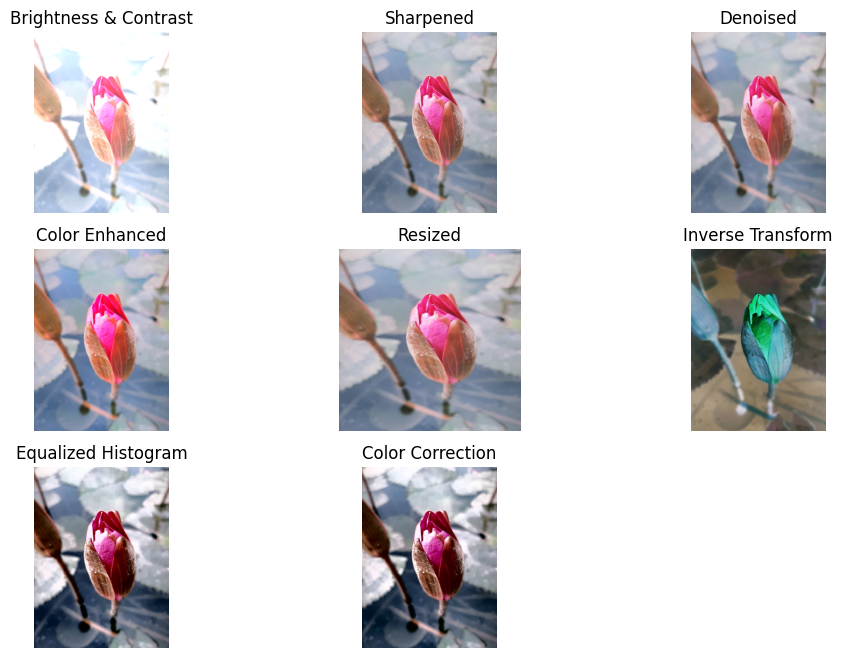

In [ ]:
import cv2
import numpy as np
from skimage import restoration
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from cv2 import dnn_superres

def adjust_brightness_contrast(image, alpha=1.2, beta=50):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

def remove_noise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

def enhance_color(image):
    pil_img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    enhancer = ImageEnhance.Color(pil_img)
    enhanced_image = enhancer.enhance(1.5)
    return cv2.cvtColor(np.array(enhanced_image), cv2.COLOR_RGB2BGR)

def resize_image(image, width, height):
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

def inverse_transform(image):
    return cv2.bitwise_not(image)

def equalize_histogram(image):
    if len(image.shape) == 2:
        return cv2.equalizeHist(image)
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
    return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def color_correction(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l = cv2.equalizeHist(l)
    lab = cv2.merge((l, a, b))
    return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

def process_image(image_path):
    image = cv2.imread(image_path)
    processed_images = {
        "Brightness & Contrast": adjust_brightness_contrast(image),
        "Sharpened": sharpen_image(image),
        "Denoised": remove_noise(image),
        "Color Enhanced": enhance_color(image),
        "Resized": resize_image(image, 300, 300),
        "Inverse Transform": inverse_transform(image),
        "Equalized Histogram": equalize_histogram(image),
        "Color Correction": color_correction(image),
    }

    plt.figure(figsize=(12, 8))
    for i, (title, img) in enumerate(processed_images.items()):
        plt.subplot(3, 3, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

# Example usage
process_image("p5.jpg")  # Replace 'input.jpg' with your image file


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision import models
from tqdm import tqdm
import os

# Device setup
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Clear cache before training
torch.cuda.empty_cache()

# -------------------------
# CIFAR-100 Classification with AlexNet & VGG16
# -------------------------
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True)

        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            progress_bar.set_postfix(loss=running_loss / (progress_bar.n + 1))

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")

def evaluate_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")

# Load dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet normalization
])

train_set = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_set = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=16, shuffle=True)  # Reduce batch size to avoid OOM
test_loader = DataLoader(test_set, batch_size=16, shuffle=False)


# ------------------------
# AlexNet Model
# ------------------------
alexnet = models.alexnet(weights=models.AlexNet_Weights.IMAGENET1K_V1)  # Fix weight loading
alexnet.classifier[6] = nn.Linear(4096, 100)
alexnet.to(device)

alexnet_criterion = nn.CrossEntropyLoss()
alexnet_optimizer = optim.SGD(alexnet.parameters(), lr=0.0001, momentum=0.9)  # Changed optimizer

train_model(alexnet, train_loader, alexnet_criterion, alexnet_optimizer)
evaluate_model(alexnet, test_loader)

100%|██████████| 169M/169M [00:04<00:00, 41.6MB/s]
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 164MB/s]
Epoch 1/5: 100%|██████████| 3125/3125 [55:49<00:00,  1.07s/it, loss=2.17]


Epoch 1, Loss: 2.1712


Epoch 2/5: 100%|██████████| 3125/3125 [53:49<00:00,  1.03s/it, loss=1.37]


Epoch 2, Loss: 1.3705


Epoch 3/5: 100%|██████████| 3125/3125 [53:37<00:00,  1.03s/it, loss=1.16]


Epoch 3, Loss: 1.1605


Epoch 4/5:  96%|█████████▋| 3013/3125 [52:01<01:52,  1.00s/it, loss=1.03]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision import models
from tqdm import tqdm

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------
# CIFAR-100 Classification with VGG16
# -------------------------
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True)

        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            progress_bar.set_postfix(loss=running_loss / (progress_bar.n + 1))

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")

def evaluate_model(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")

# Load dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet normalization
])

train_set = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
test_set = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=16, shuffle=True)  # Adjusted batch size for Colab
test_loader = DataLoader(test_set, batch_size=16, shuffle=False)

# ------------------------
# VGG16 Model
# ------------------------
vgg16 = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)  # Fix weight loading
vgg16.classifier[6] = nn.Linear(4096, 100)
vgg16.to(device)

vgg16_criterion = nn.CrossEntropyLoss()
vgg16_optimizer = optim.SGD(vgg16.parameters(), lr=0.0001, momentum=0.9)  # Optimizer settings

train_model(vgg16, train_loader, vgg16_criterion, vgg16_optimizer)
evaluate_model(vgg16, test_loader)

100%|██████████| 169M/169M [00:07<00:00, 22.1MB/s]
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 138MB/s]
Epoch 1/5: 100%|██████████| 3125/3125 [13:29<00:00,  3.86it/s, loss=2.23]


Epoch 1, Loss: 2.2270


Epoch 2/5: 100%|██████████| 3125/3125 [13:30<00:00,  3.86it/s, loss=1.19]


Epoch 2, Loss: 1.1927


Epoch 3/5: 100%|██████████| 3125/3125 [13:32<00:00,  3.85it/s, loss=0.961]


Epoch 3, Loss: 0.9606


Epoch 4/5: 100%|██████████| 3125/3125 [13:29<00:00,  3.86it/s, loss=0.803]


Epoch 4, Loss: 0.8033


Epoch 5/5: 100%|██████████| 3125/3125 [13:24<00:00,  3.89it/s, loss=0.684]


Epoch 5, Loss: 0.6837
Accuracy: 74.05%


Applying LoG on Image 1


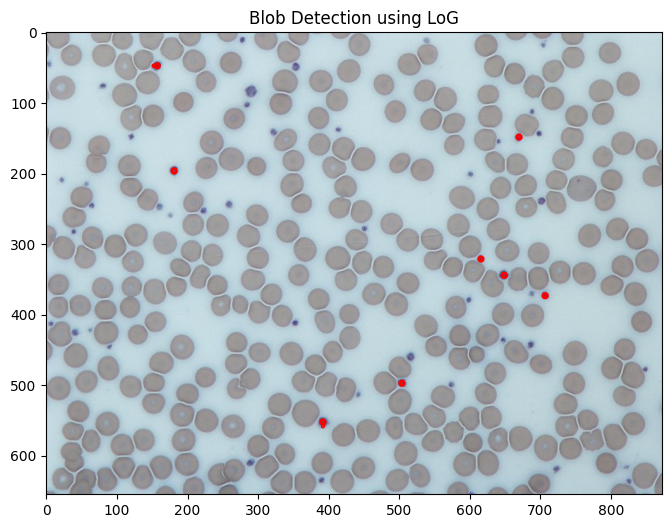

Number of blobs detected in Image 1: 10
Applying DoG on Image 1


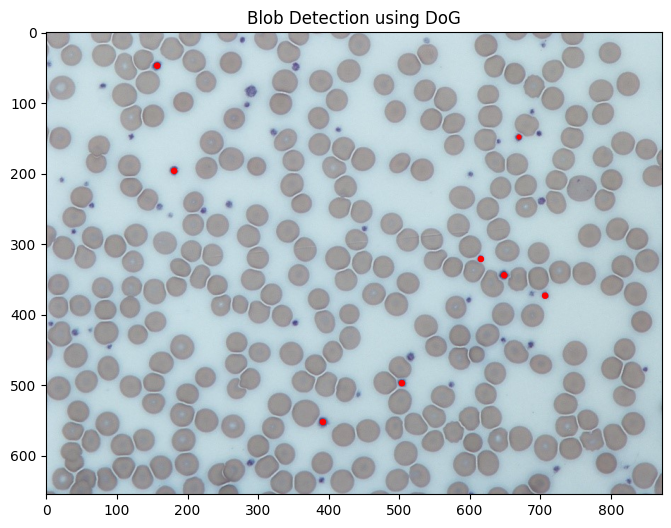

Number of blobs detected in Image 1: 8
Applying DoH on Image 1


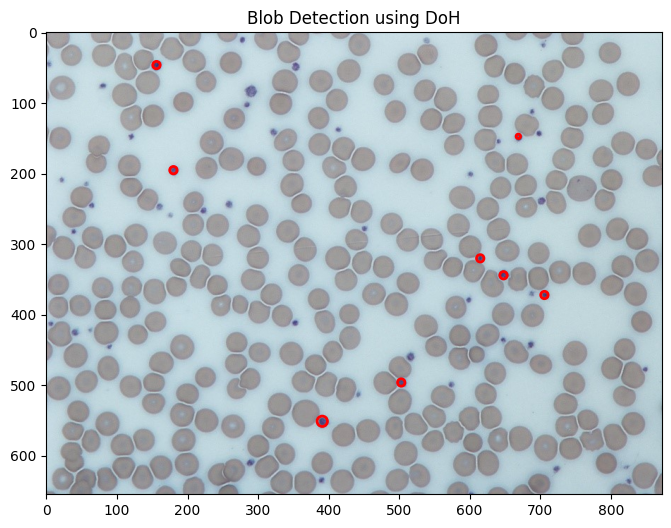

Number of blobs detected in Image 1: 8


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing, area_opening, area_closing
from skimage.io import imread

def preprocess_image(image):
    # Check if the image has an alpha channel (4 channels)
    if image.shape[2] == 4:
        # Convert RGBA to RGB by dropping the alpha channel
        image = image[:, :, :3]

    if image.ndim == 3:
        gray = rgb2gray(image)
    else:
        gray = image

    binary = gray < 0.45

    struct_elem = np.array([[0,1,0],
                             [1,1,1],
                             [0,1,0]])

    def multi_erosion(image, num):
        for _ in range(num):
            image = erosion(image, struct_elem)
        return image

    def multi_dilation(image, num):
        for _ in range(num):
            image = dilation(image, struct_elem)
        return image

    eroded = multi_erosion(binary, 2)
    opened = opening(eroded)
    dilated = multi_dilation(opened, 2)
    morphed = area_opening(area_closing(dilated, 10), 10)
    return morphed


def detect_blobs(image, method="LoG"):
    preprocessed = preprocess_image(image)

    if method == "LoG":
        blobs = blob_log(preprocessed, min_sigma=1, max_sigma=20, num_sigma=10, threshold=0.05)
    elif method == "DoG":
        blobs = blob_dog(preprocessed, min_sigma=1, max_sigma=20, sigma_ratio=1.6, threshold=0.05)
    elif method == "DoH":
        blobs = blob_doh(preprocessed, min_sigma=1, max_sigma=20, threshold=0.01)
    else:
        raise ValueError("Invalid method. Choose 'LoG', 'DoG', or 'HoG'")

    return blobs

def plot_blobs(image, blobs, method):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        circle = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(circle)
    plt.title(f"Blob Detection using {method}")
    plt.show()

# Load images
image1 = imread("p1.jpg")

# Apply different blob detection techniques
methods = ["LoG", "DoG", "DoH"]
for method in methods:
    print(f"Applying {method} on Image 1")
    blobs1 = detect_blobs(image1, method)
    plot_blobs(image1, blobs1, method)
    print(f"Number of blobs detected in Image 1: {len(blobs1)}")